In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
train_df = pd.read_csv(r'D:\Python\Codes\Celebal\Assignments\assignment7\train.csv')
test_df = pd.read_csv(r'D:\Python\Codes\Celebal\Assignments\assignment7\test.csv')

# Display the first few rows of each dataframe to understand their structure
train_df.head(), test_df.head()

(   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
 0   1          60       RL         65.0     8450   Pave   NaN      Reg   
 1   2          20       RL         80.0     9600   Pave   NaN      Reg   
 2   3          60       RL         68.0    11250   Pave   NaN      IR1   
 3   4          70       RL         60.0     9550   Pave   NaN      IR1   
 4   5          60       RL         84.0    14260   Pave   NaN      IR1   
 
   LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
 0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
 2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
 3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
 4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   
 
   YrSold  SaleType  SaleCondition  SalePrice  
 0   2

In [28]:
# Function to visualize missing values
def visualize_missing_values(df, title):
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title(title)
    plt.show()

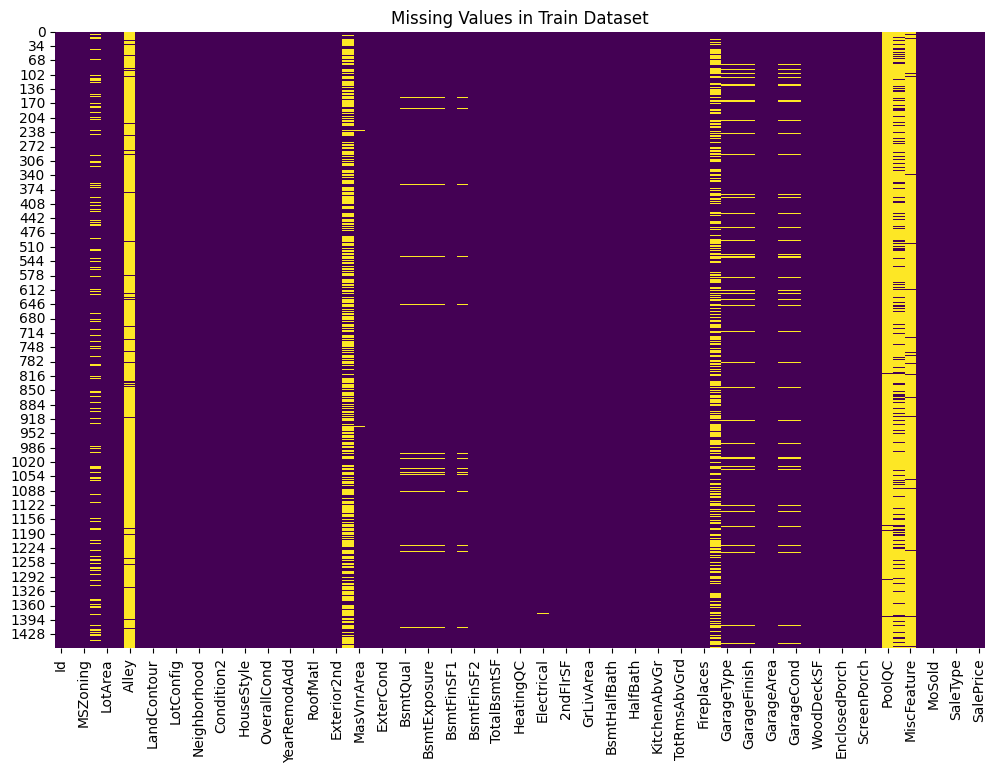

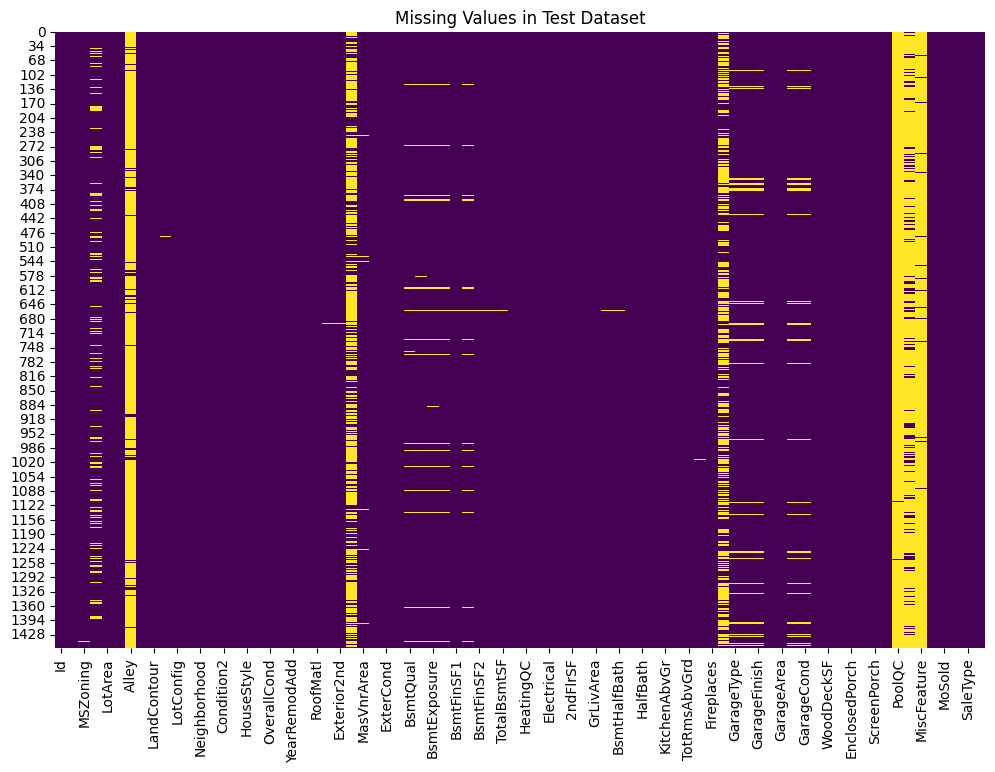

In [29]:
# Visualize missing values in train and test datasets
visualize_missing_values(train_df, 'Missing Values in Train Dataset')
visualize_missing_values(test_df, 'Missing Values in Test Dataset')

In [30]:
# Display columns with missing values and their counts
missing_train = train_df.isnull().sum()
missing_test = test_df.isnull().sum()

missing_train = missing_train[missing_train > 0].sort_values(ascending=False)
missing_test = missing_test[missing_test > 0].sort_values(ascending=False)

missing_train, missing_test

(PoolQC          1453
 MiscFeature     1406
 Alley           1369
 Fence           1179
 MasVnrType       872
 FireplaceQu      690
 LotFrontage      259
 GarageType        81
 GarageYrBlt       81
 GarageFinish      81
 GarageQual        81
 GarageCond        81
 BsmtFinType2      38
 BsmtExposure      38
 BsmtFinType1      37
 BsmtCond          37
 BsmtQual          37
 MasVnrArea         8
 Electrical         1
 dtype: int64,
 PoolQC          1456
 MiscFeature     1408
 Alley           1352
 Fence           1169
 MasVnrType       894
 FireplaceQu      730
 LotFrontage      227
 GarageCond        78
 GarageYrBlt       78
 GarageQual        78
 GarageFinish      78
 GarageType        76
 BsmtCond          45
 BsmtExposure      44
 BsmtQual          44
 BsmtFinType1      42
 BsmtFinType2      42
 MasVnrArea        15
 MSZoning           4
 BsmtFullBath       2
 BsmtHalfBath       2
 Functional         2
 Utilities          2
 GarageCars         1
 GarageArea         1
 TotalBsmtSF     

In [31]:
# Fill missing values in the train dataset
for column in train_df.columns:
    if train_df[column].dtype == "object":
        train_df[column].fillna(train_df[column].mode()[0], inplace=True)
    else:
        train_df[column].fillna(train_df[column].median(), inplace=True)

In [32]:
# Fill missing values in the test dataset
for column in test_df.columns:
    if test_df[column].dtype == "object":
        test_df[column].fillna(test_df[column].mode()[0], inplace=True)
    else:
        test_df[column].fillna(test_df[column].median(), inplace=True)

In [33]:
# Verify that there are no missing values left
train_df.isnull().sum().sum(), test_df.isnull().sum().sum()

(0, 0)

In [34]:
# Create new features

train_df['TotalSF'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']
test_df['TotalSF'] = test_df['TotalBsmtSF'] + test_df['1stFlrSF'] + test_df['2ndFlrSF']

train_df['TotalBath'] = (train_df['FullBath'] + 0.5 * train_df['HalfBath'] +
                         train_df['BsmtFullBath'] + 0.5 * train_df['BsmtHalfBath'])
test_df['TotalBath'] = (test_df['FullBath'] + 0.5 * test_df['HalfBath'] +
                        test_df['BsmtFullBath'] + 0.5 * test_df['BsmtHalfBath'])

In [35]:
# Encode categorical variables using one-hot encoding
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

# Align the train and test dataframes by the columns
train_df, test_df = train_df.align(test_df, join='inner', axis=1)

# Add the target variable back to the training data
train_df['SalePrice'] = pd.read_csv(r'D:\Python\Codes\Celebal\Assignments\assignment7\train.csv')['SalePrice']

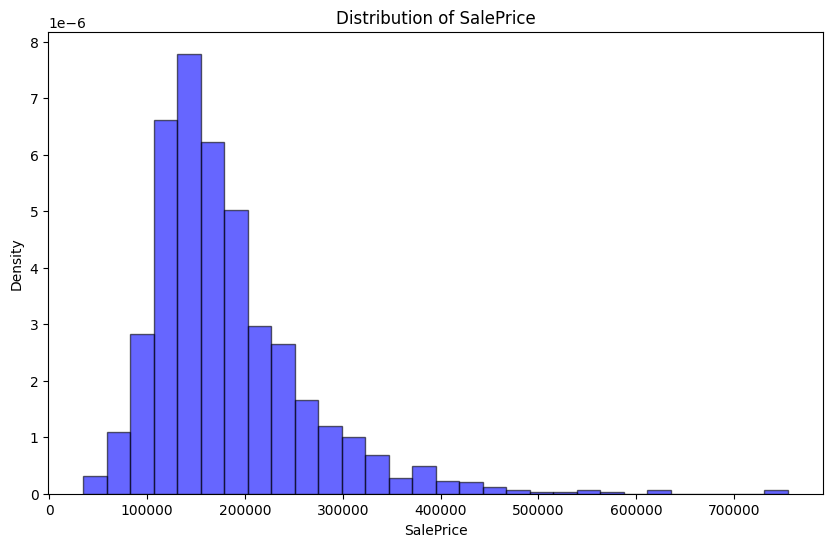

In [36]:
# Distribution of SalePrice using Matplotlib
plt.figure(figsize=(10, 6))
plt.hist(train_df['SalePrice'], bins=30, alpha=0.6, color='b', edgecolor='black', density=True)

plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Density')
plt.show()


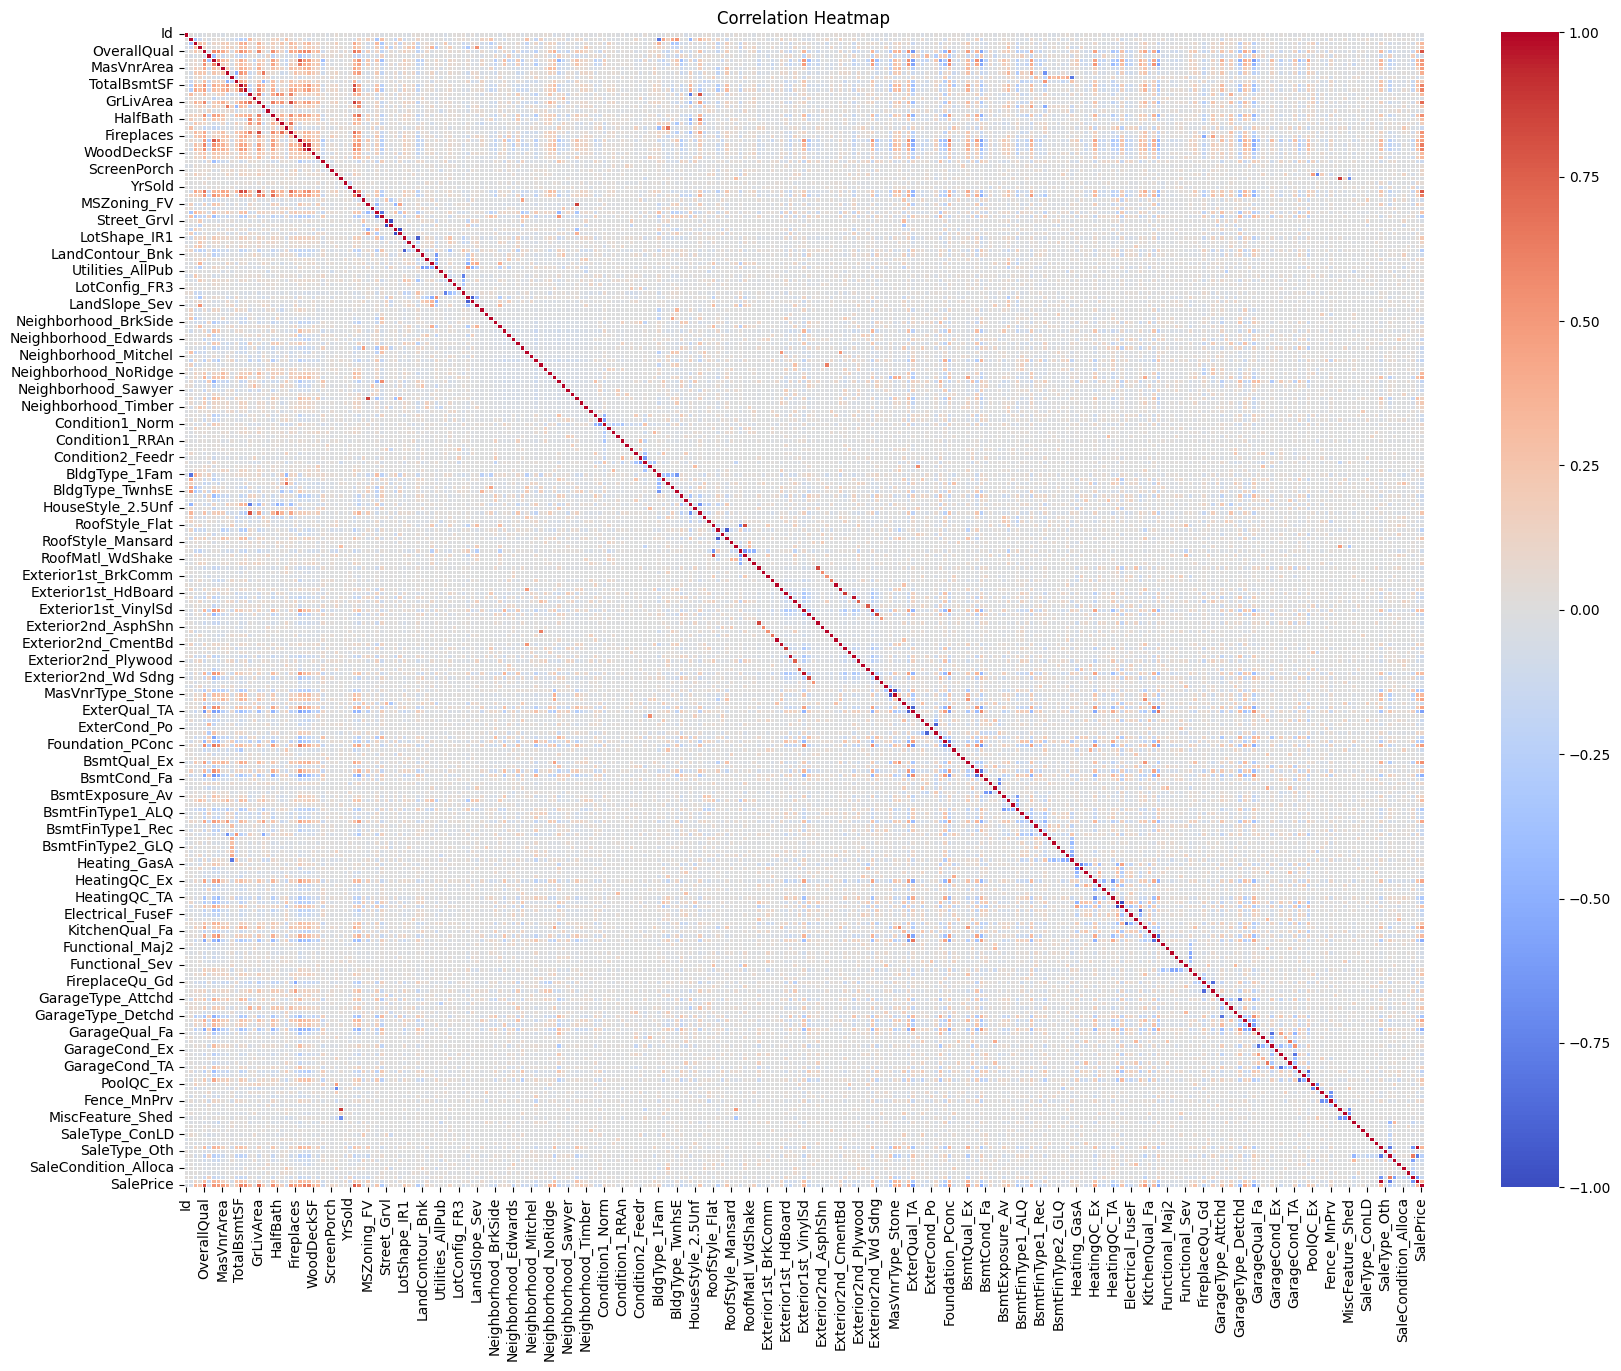

In [37]:
# Correlation heatmap
plt.figure(figsize=(20, 15))
corr_matrix = train_df.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()